# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.


##Objectives

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?


## Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/E_News_Proj/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [40]:
# The first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [41]:
#The last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [42]:
#The shape of the dataset
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 100 rows and 6 columns.


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations**

* There are four object, one interger, and one float data types in the dataset.
* The dataset utilizes a total of memorey space of 4.8+ KB
* The time_spent_on_the_page column was saved as float datatype but it should be converted to datetime datatype

**Observations**
* There are 100 rows and 6 columns in the dataset

In [44]:
#The statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


**Observations**

* The average time spent on the page is about 5 minutes 37 seconds
* The minimum and maximum time spent on the page ranges between 19 seconds and about 11 minutes.

In [45]:
#Check for missing values in the dataset
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Observations**
* There are no missing values in the dataset

### Univariate Analysis

In [46]:
df['user_id'].unique()

array([546592, 546468, 546462, 546567, 546459, 546558, 546448, 546581,
       546461, 546548, 546588, 546546, 546491, 546478, 546578, 546466,
       546443, 546555, 546493, 546549, 546560, 546584, 546450, 546475,
       546456, 546455, 546469, 546586, 546471, 546575, 546464, 546556,
       546585, 546577, 546587, 546552, 546551, 546557, 546487, 546589,
       546559, 546570, 546489, 546453, 546488, 546565, 546460, 546458,
       546492, 546473, 546554, 546457, 546479, 546576, 546482, 546563,
       546569, 546454, 546562, 546574, 546470, 546467, 546572, 546590,
       546553, 546445, 546545, 546582, 546484, 546579, 546568, 546476,
       546452, 546444, 546591, 546583, 546573, 546485, 546486, 546547,
       546490, 546449, 546463, 546580, 546571, 546564, 546465, 546480,
       546447, 546561, 546477, 546451, 546566, 546474, 546550, 546446,
       546544, 546472, 546481, 546483])

#### Group

In [47]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

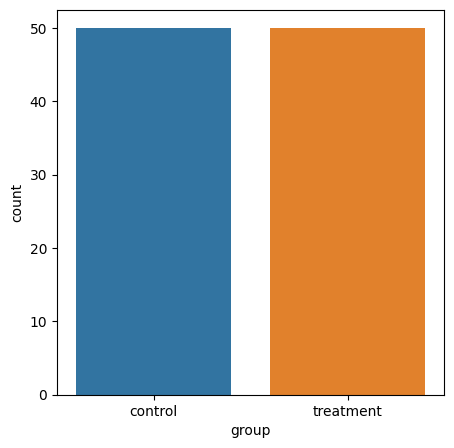

In [48]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='group')
plt.show()

**Observation**
* The group column contains two categories of users, namely control and treatment.
* There are 50 user each in control and treament of the group column

#### Landing page

In [49]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

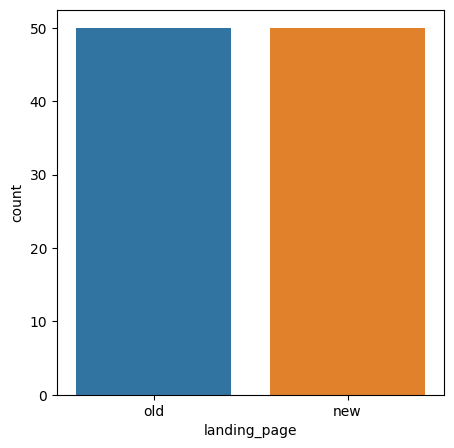

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(df, x='landing_page')
plt.show()

**Observation**
*The landing_page column has 50 each users categorized into old and new web pages.

#### Preferred language

In [51]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

<Axes: xlabel='language_preferred', ylabel='count'>

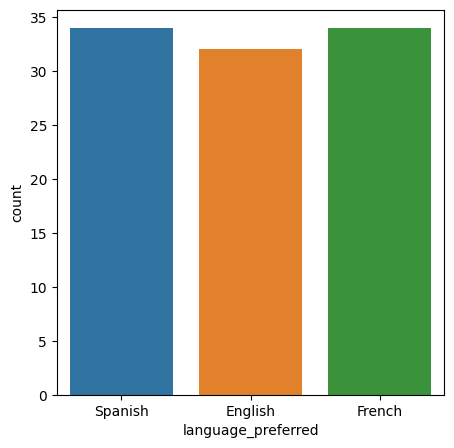

In [52]:
plt.figure(figsize=(5,5))
sns.countplot(df, x='language_preferred')

#### Time spent on the page

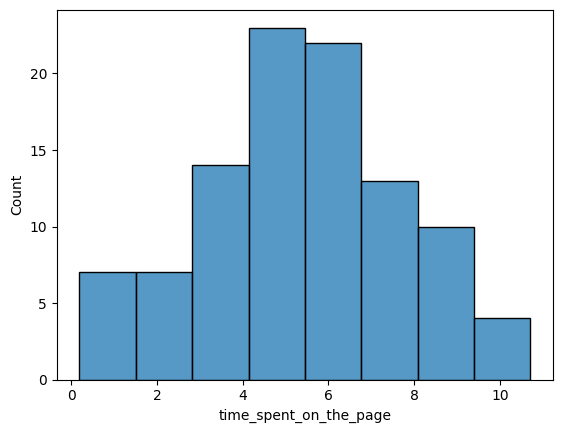

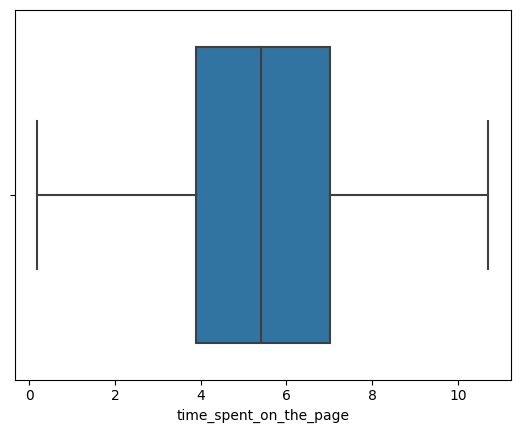

In [53]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(df, x = 'time_spent_on_the_page')
plt.show()

#### Converted

In [54]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

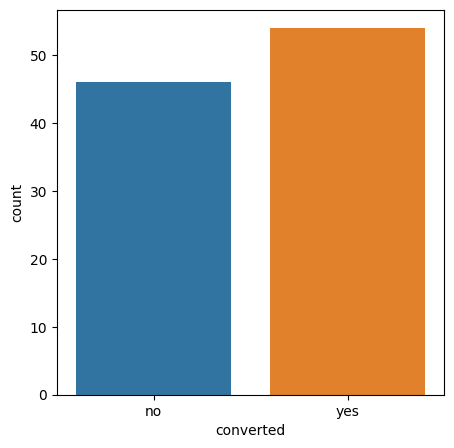

In [55]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='converted')
plt.show()

### Bivariate Analysis

#### Time Spent vs Preferred Language

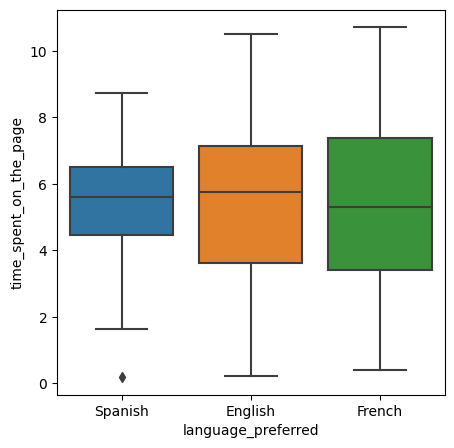

In [56]:
plt.figure(figsize = (5, 5))
sns.boxplot(data=df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

**Observations**
* The average time spent by preferred languages on the site are as follows:
  * Spanish is about 5 minutes and 50 seconds.
  * English is approximately 6 minutes.
  * French is about 5 minutes 45 seconds.

* Spanish has some outliers which must be investigated, and the time spent by Spanish readers ranges between under 2 minutes to about 8 minutes and 45 seconds.

#### Time spent on the page vs Converted


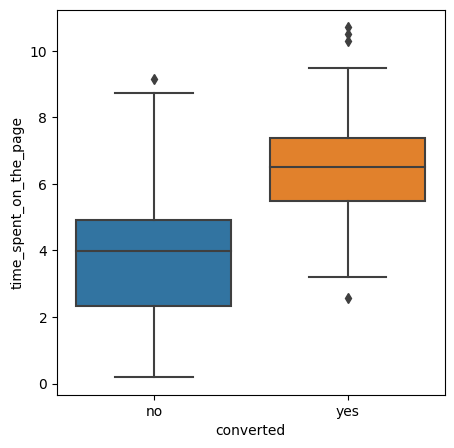

In [57]:
plt.figure(figsize = (5, 5))
sns.boxplot(data = df, x='converted', y='time_spent_on_the_page')
plt.show()

**Observations**
* The average time spent by those who converted was above 6 minutes, as compred to 4 minutes spent by those were not converted.

* There are some outliers which needs to be investigated

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Visual Analysis

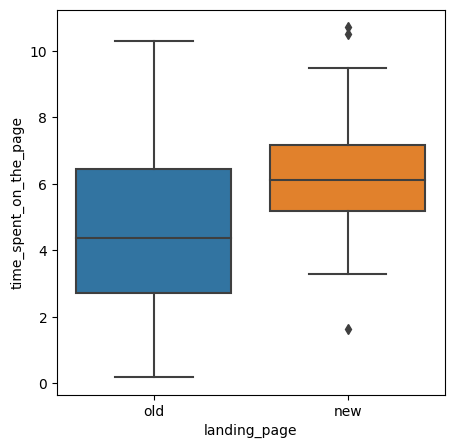

In [22]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()

**Observations**
* The boxplot above shows that users spend more time on the new landing page than the old landing page.

* Users spend a little more than 6 minutes averagely on the new page, compared to the little over 4 minutes on the old page.


### Step 1: Define the null and alternate hypotheses


Let $\mu_1, \mu_2$ be the mean time spent on old landing page, and new landing page respectively.

We will test the null hypothesis

>$H_0:\mu_2=<\mu_1$

Against the alternate hypothesis

>$H_a:\mu_2>\mu_1$  

### Step 2: Select Appropriate test

* This is a one-tailed test concerning two population means from two independent populations

* The population standard deviations are unknown.  
* The **2-sample ind. t-test** will be appropraite to conduct the test.

### Step 3: Decide the significance level

* AS given in the objectives the $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [23]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']
print('The sample standard deviation of time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of time spent on the new page is: 1.82
The sample standard deviation of time spent on the new page is: 2.58


* The sample standard deviation of time spent for the two groups i.e the new landing page and the old landing page are not equal.

### Step 5: Calculate the p-value

In [24]:
from scipy.stats import ttest_ind
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'two-sided')
print('The p-value is', p_value)

The p-value is 0.0002784762450333098


### Step 6: Compare the p-value with $\alpha$

In [25]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0002784762450333098 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

* As the p-value 0.00027 is less than the level of significance, we can reject the null hypothesis.

* Therefore we can safely conclude that users spend more time on the new landing page than the existing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

**Visual Analysis of conversion rate**

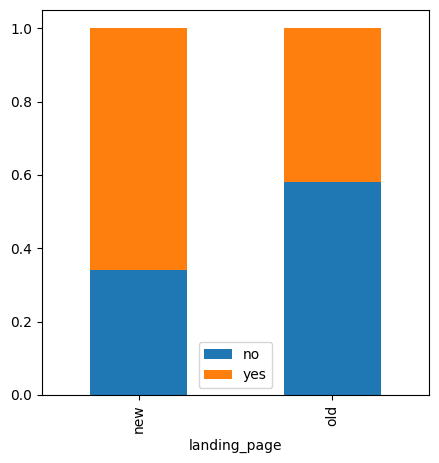

In [26]:
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(5,5),stacked=True)
plt.legend()
plt.show()

**Observations**
* As we can see in the visual above the rate of conversion on the new landing page is higher in comparison to the old landing page.

### Step 1: Define the null and alternate hypotheses

Let $p_1$, and $p_2$ be the proprotion of users converted on the old and new landing pages respectively.

We will test the null hypothesis
>$H_0: p_2=p_1$

against the alternate hypothesis

>$H_a: p_2>p_1$



### Step 2: Select Appropriate test

* This is a one-tailed test concerning two population proportions from two independent populations.
* The Standard Deviations for both populations are known.
* The sample data is randomly selected.
* The One-tailed z-test is most appropriate

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [27]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
n_control = df.group.value_counts()['control']
n_treatment = df.group.value_counts()['treatment']
print('There are', n_control, 'users on the new page and', n_treatment, 'users on the old page.')

There are 50 users on the new page and 50 users on the old page.


### Step 5: Calculate the p-value

In [28]:
from statsmodels.stats.proportion import proportions_ztest
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')
print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [29]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

* As the p-value is much less than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical significance to conclude that the conversion rate of the new landing page is greater than the old landing page.

## 3. Is the conversion and preferred language independent or related?

### Visual Analysis

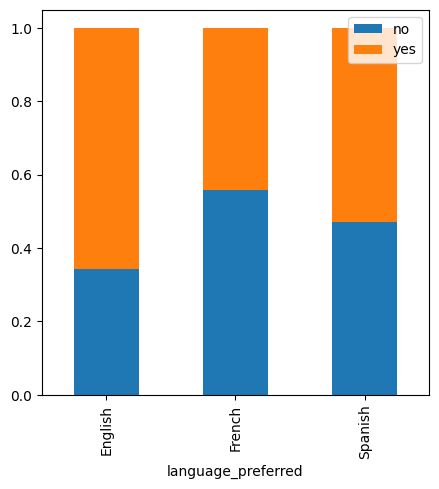

In [30]:
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(5,5), stacked=True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0:$ The conversion and preferred language are independent.

$H_a:$ The conversion and preferred language are related.


### Step 2: Select Appropriate test

* This is a problem of the test of independence, concerning two categorical variables i.e converted status and preferred language.
* Based on the given information we select Chi-Square Test of Independence.

### Step 3: Decide the significance level

* As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [31]:
contingency_table = pd.crosstab(df['language_preferred'],df['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [32]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [33]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Make inference

* As the p_value of 0.2129 is greater than the level of significance, we fail to reject the null hypothesis.

* Therefore we can conclude that there is not enough evidence to suggest that the two categorical variables are related.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [34]:
df_new = df[df['landing_page'] == 'new']

df_new.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


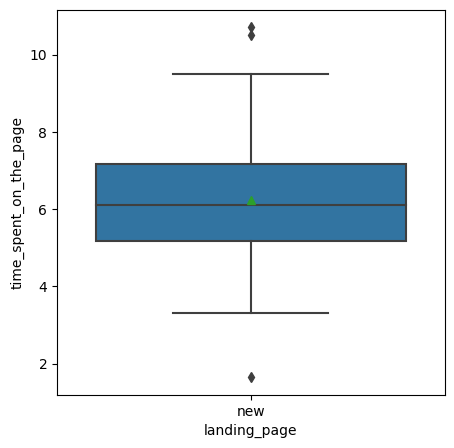

In [35]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

In [36]:
df_new.groupby(df_new['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new    6.2232
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent by English, French, and Spanish language users on the new page respectively.


$H_0:$ $u_1 = \mu_2 = \mu_3$

$H_a:$ At least one language is different from the rest.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. Therefore one_way ANOVA wil be the appropriate to test for differences in means of three populations.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [37]:
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [38]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [39]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

* As the p-value 0.43 is greater than the level of significance, we fail to reject the null hypothesis.



## Conclusion and Business Recommendations


* Statiscal evidence shows that users spend more time on the new landing page than the old landing page.

* The proportion of users converted is higher on the new landing page than the old landing page.

* There is no relation between preferred language and the conversion rate.

* The English, French, and Spanish language users all spent the same average amount of time on the new landing page.

* Considering the above outcomes I would recommend that the new landing page replace the old landing page.

___